In [3]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/")
sys.path.append("/home/bl3/PycharmProjects/pygeomod/pygeomod")
sys.path.append("/home/miguel/anaconda3/lib/python3.5/site-packages/pymc")

import GeoMig
#import geogrid
#importlib.reload(GeoMig)
importlib.reload(GeoMig)
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx
from skimage import measure

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 5, linewidth= 130, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import pymc as pm
%matplotlib inline


In [7]:
xmin = 696000
xmax = 747000
ymin = 6863000
ymax = 6950000
zmin = -20000
zmax = 2000
"""
xmin = layers[:,0].min()
xmax = layers[:,0].max()
ymin = layers[:,1].min()
ymax = layers[:,1].max()
zmin = layers[:,2].min()
zmax = layers[:,2].max()
"""
nx = 1
ny = 1
nz = 1
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
dz = (zmax-zmin)/nz

interpolator = GeoMig.GeoMigSim_pro2(c_o = np.float32(1),
        range = np.float32(np.sqrt((xmax-xmin)**2+(ymax-ymin)**2+(zmax-zmin)**2))) # Range used in geomodeller
# Setting the extent and resolution of the grid



#Genereting a regular grid
interpolator.create_regular_grid_3D(xmin,xmax,ymin,ymax,zmin,zmax,nx,ny,nz)


interpolator.theano_set_3D_nugget()

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:32: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


### Defining Input data

In [8]:
import pandas as pn
Foliations = pn.read_csv("a_Foliations.csv")
Points = pn.read_csv("a_Points.csv")
Foliations[Foliations["formation"] == "EarlyGranite"];

So there is four series, 3 of one single layer and 1 with 2. Therefore we need 4 potential fields, so lets begin.

### Early Granite
#### Points

In [5]:
# We extract the points of the formations and we make a numpy array float 32 out of it
layers = Points[Points["formation"] == "EarlyGranite"].as_matrix()[:,:-1].astype("float32")
layers
# The code for rest and ref has to change a bit according to the number of layer per formation
rest = layers[1:]
ref = np.tile(layers[0],(np.shape(layers)[0]-1,1))
rest, ref;

### Foliations

In [6]:
dips = Foliations[Foliations["formation"] == "EarlyGranite"].as_matrix()[:,:3].astype("float32")
dips_angles = Foliations[Foliations["formation"] == "EarlyGranite"]["dip"].as_matrix().astype("float32")
azimuths = Foliations[Foliations["formation"] == "EarlyGranite"]["azimuth"].as_matrix().astype("float32")
polarity = Foliations[Foliations["formation"] == "EarlyGranite"]["polarity"].as_matrix().astype("float32")

### Choosing important isovalues to plot

### Plotting potential field

In [8]:
xmin = layers[:,0].min()
xmax = layers[:,0].max()
ymin = layers[:,1].min()
ymax = layers[:,1].max()
zmin = layers[:,2].min()
zmax = layers[:,2].max()

nx = 50
ny = 50
nz = 50
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
dz = (zmax-zmin)/nz

#Genereting a regular grid
interpolator.create_regular_grid_3D(xmin,xmax,ymin,ymax,zmin,zmax,nx,ny,nz)
interpolator.theano_set_3D_nugget()

val = interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0]

G_x, G_y, G_z = interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[-3:]

sol_early_granite = val.reshape(50,50,50,
    order = "C")


arg1,h1 = np.argmin((abs(interpolator.grid - ref[0])).sum(1)), val[np.argmin((abs(interpolator.grid - ref[0])).sum(1))]
arg2, h2 =np.argmin((abs(interpolator.grid - ref[1])).sum(1)), val[np.argmin((abs(interpolator.grid - ref[1])).sum(1))]

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [18]:
G_x, G_y, G_z 

(array([ 0.17,  0.17,  0.89, -0.44, -0.86, -0.98, -0.67,  0.31,  0.84,  0.24, -0.86, -0.98, -0.1 ,  0.57,  0.82, -0.96, -0.95,
         0.06,  0.45,  0.6 , -0.78, -0.96,  0.44,  0.78,  0.74,  0.78], dtype=float32),
 array([-0.97, -0.97, -0.41, -0.88,  0.48,  0.11, -0.72, -0.93, -0.51, -0.96,  0.48, -0.07, -0.98, -0.8 , -0.55, -0.24, -0.26,
        -0.98, -0.87, -0.78, -0.6 ,  0.24, -0.88, -0.6 , -0.65, -0.6 ], dtype=float32),
 array([ 0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,
         0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17,  0.17], dtype=float32))

# PyMC model

In [22]:
model.value

In [71]:
a = pm.Uniform('a', lower=-1.1, upper=1.1, )
b = pm.Uniform('b', lower=-1.1, upper=1.1, )
c = pm.Uniform('c', lower=-1.1, upper=1.1, )
d = pm.Uniform('d', lower=-1.1, upper=1.1, )
e = pm.Uniform('e', lower=-1.1, upper=1.1, )
f = pm.Uniform('f', lower=-1.1, upper=1.1, )

@pm.deterministic
def model(value = 0, a = a ,b = b,c = c,d = d,e= e,f =f, Geosol = Geosol):
    sol = interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 a,b,c,d,e,f)[1]

    
    error = abs(sol-Geosol).sum()
    #print (error)
    return error
    
like= pm.normal_like(model,0,1./np.square(10))
model = pm.Model([a,b,c,d,e,f, model, like])    




In [72]:
M = pm.MAP(model)
M.fit()

In [73]:
N = pm.MCMC(model)
N.sample( 60000, burn = 10000)

 [-----------------100%-----------------] 60000 of 60000 complete in 319.9 sec

Plotting b
Plotting e
Plotting d
Plotting model
Plotting f
Plotting c
Plotting a


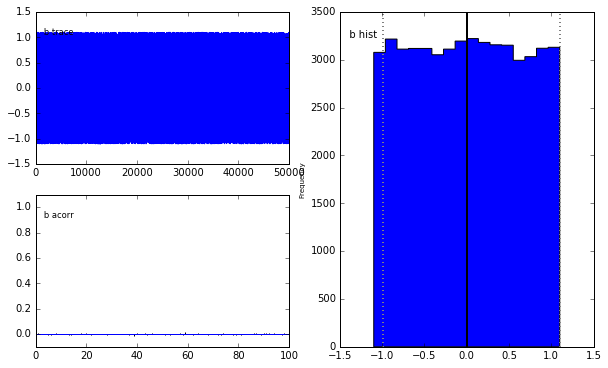

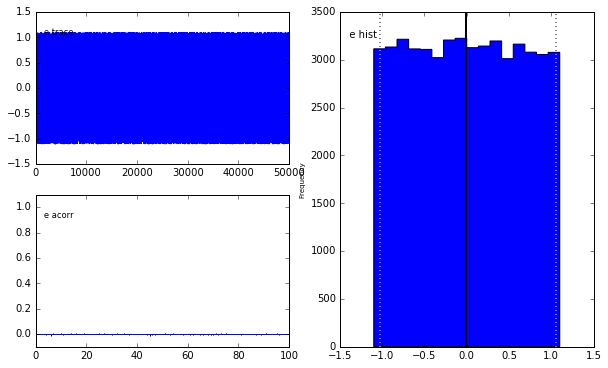

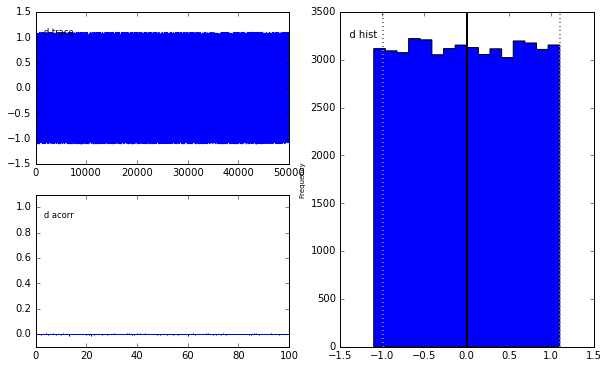

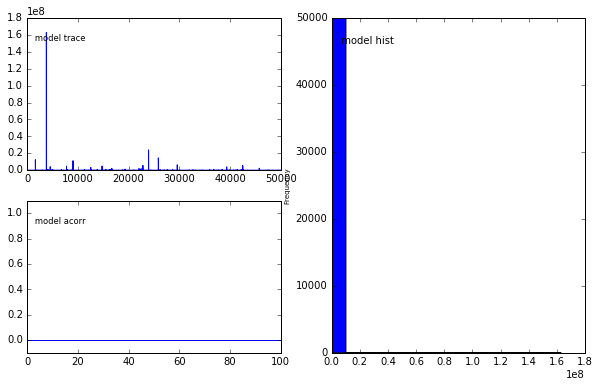

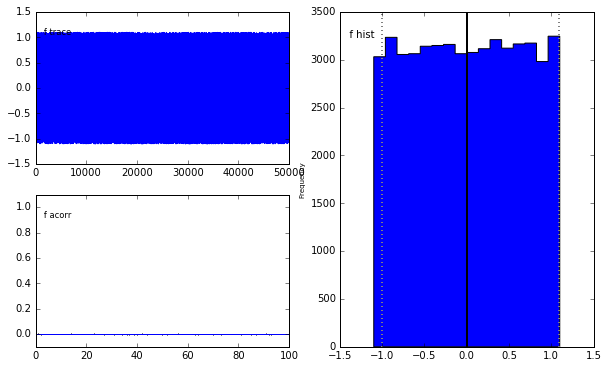

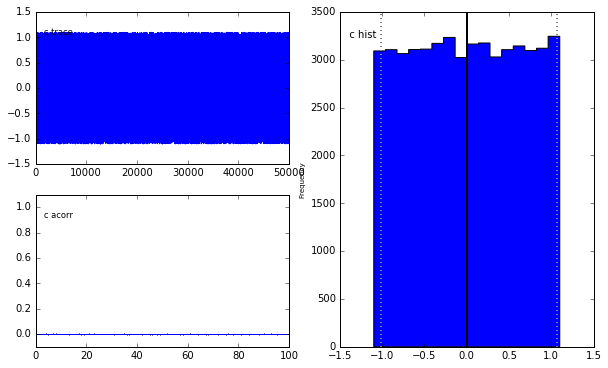

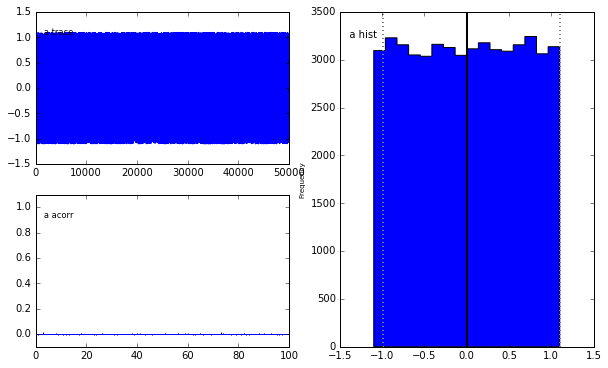

In [74]:
pm.Matplot.plot(N)

In [68]:
a.value, b.value, c.value, d.value, e.value, f.value

(array(-0.37739739466794414),
 array(-0.13943784786519647),
 array(-0.975171905807656),
 array(-0.7816002898779952),
 array(0.6723795894367699),
 array(-0.7635675189746347))

In [75]:
interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 1,1,1,1,1,1)[1]

array([-0.17423, -0.16994, -0.89379,  0.43981,  0.85804,  0.97924,  0.67241, -0.31074, -0.84417, -0.23847,  0.86251,  0.98235,
        0.10203, -0.57001, -0.8192 ,  0.95513,  0.94883, -0.0639 , -0.45229, -0.5981 ,  0.78306,  0.95567, -0.43937, -0.78219,
       -0.73566, -0.78244,  0.96919,  0.96995,  0.41321,  0.88114, -0.4836 , -0.10562,  0.71955,  0.9344 ,  0.50695,  0.95542,
       -0.47555,  0.07082,  0.97946,  0.80296,  0.54639,  0.24025,  0.26405,  0.98268,  0.87471,  0.78227,  0.59731, -0.23825,
        0.88127,  0.59816,  0.65453,  0.5978 , -0.17346, -0.17349, -0.1735 , -0.1735 , -0.17351, -0.17351, -0.17352, -0.17352,
       -0.17353, -0.17353, -0.17353, -0.17353, -0.17353, -0.17353, -0.17352, -0.17352, -0.17352, -0.17351, -0.1735 , -0.17349,
       -0.17348, -0.17347, -0.17347, -0.17344, -0.17342, -0.17341,  0.01965, -0.14856,  0.03344, -0.0481 ,  0.17359, -0.02591,
        0.00868, -0.00676, -0.01887,  0.04345, -0.03408,  0.04751, -0.02246, -0.05408, -0.07096,  0.17041, -0.0

In [7]:
interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 0.1,-0.333333,1,0.85,8.5,1)[1]

array([ 0.5227 ,  0.50983,  2.68136, -1.31943, -2.57412, -2.93773, -2.01723,  0.93223,  2.53251,  0.71542, -2.58753, -2.94705,
       -0.30609,  1.71002,  2.45761, -2.8654 , -2.84649,  0.19171,  1.35686,  1.79429, -2.3492 , -2.86703,  1.31811,  2.34658,
        2.207  ,  2.34733, -2.90758, -2.90986, -1.23963, -2.64341,  1.4508 ,  0.31687, -2.15867, -2.80321, -1.52086, -2.86625,
        1.42666, -0.21245, -2.93838, -2.40889, -1.63918, -0.72076, -0.79214, -2.94803, -2.62414, -2.34681, -1.79193,  0.71476,
       -2.6438 , -1.79448, -1.9636 , -1.79342,  0.52039,  0.52047,  0.5205 ,  0.5205 ,  0.52052,  0.52054,  0.52055,  0.52057,
        0.52058,  0.52058,  0.52059,  0.52059,  0.52058,  0.52057,  0.52057,  0.52056,  0.52056,  0.52054,  0.5205 ,  0.52045,
        0.52042,  0.52041,  0.52039,  0.52032,  0.52024,  0.52019, -0.0254 ,  0.43072, -0.05501,  0.09475, -0.50809,  0.07634,
       -0.0586 ,  0.06909,  0.04297, -0.1455 ,  0.12432, -0.15471,  0.05073,  0.20251,  0.1777 , -0.50476,  0.1

In [8]:
Geosol= np.array([ -0.494367331452782277079194273028406314551830291748046875,
            4.4761804618452689652485787519253790378570556640625,
            32.69416089031322059099693433381617069244,
            -14.9485078272018583334102004300802946090,
            -35.4934529937311467051586078014224767684,
            -23.6810174833367348412593855755403637886,
            -8.80176351750442442778421536786481738090,
            4.748678288005832470730638306122273206710,
            24.12070745505512547879334306344389915466,
            14.78408642841888820385065628215670585632,
            -38.4153337910083223505353089421987533569,
            -28.8661029941849207602899696212261915206,
            -1.64601120901962816311936421698192134499,
            9.463655832215408736374229192733764648437,
            36.44083382781891344848190783523023128509,
            -33.3979732424469020202195679303258657455,
            -25.7808322037861472608710755594074726104,
            -0.13669141974115198157058159722510026767,
            7.063496442347805270856042625382542610168,
            9.809489460541469085796961735468357801437,
            -21.9543677332985254224695381708443164825,
            -35.1978586464862317484403320122510194778,
            20.91036266058118542332522338256239891052,
            9.613640971415303937419594149105250835418,
            1.922854499502433256452604837249964475631,
            0.097713073577812892267502320464700460433,
            0.164629376250132519743374359677545726299,
            -15.7221409809494065967783171799965202808,
            -21.3709260058900589740460418397560715675,
            -27.8875752772168112869621836580336093902,
            14.89334302480902394449913117568939924240,
            1.319962724773707352099449963134247809648,
            -8.92056745581668764089044998399913311004,
            -20.1637566942762411770218022866174578666,
            -21.7748336471977417261314258212223649024,
            -43.3839543010954926671729481313377618789,
            16.32138132043006351068470394238829612731,
            -4.60959040184675483686760344426147639751,
            -15.2051646969450828805747732985764741897,
            -15.7115175591152240741621426423080265522,
            -27.2920316770550996920974284876137971878,
            -6.71136679887103415609317380585707724094,
            -7.06052295634130189228017115965485572814,
            -17.5228585410552355483559949789196252822,
            -13.0246416811237128996481260401196777820,
            -22.6857835875764770605655940016731619834,
            -18.2812438242739574434381211176514625549,
            7.694091711492409224604216433363035321235,
            -39.5511383736954869050350680481642484664,
            -8.23322178090050726950721582397818565368,
            -0.93102668185004722190001302806194871664,
            -0.14124654223917998407955565198790282011,
            0.016155051046941704129267236567102372646,
            0.025001370364444056720865106058226956520,
            0.017428517695721731234348439443238021340,
            0.044366787354289193012757408496327116154,
            -0.26407292612287242006274823324929457157,
            -0.04392698616817822254709824392193695530,
            0.008051421504406318374602591347866109572,
            -0.09263251582283868468259413475607289001,
            -0.07921093424039588049012650117219891399,
            -0.02557437136675440314537155472862650640,
            -0.03519920205159773884950880074029555544,
            -0.04684888295249243356233037616220826748,
            -0.05212466254480897093204205816618923563,
            -0.02711951652601730933245249843821511603,
            0.039828823784931521867491710509057156741,
            -0.16561643563943756474188262473035138100,
            -0.23755983153630838566883198836876545101,
            0.097813971814830563689113773762073833495,
            -0.00539539414852507198672171284670184832,
            0.015884236800897066910209787238272838294,
            -0.02132125481099493569114855517909745685,
            0.053404112570853506936074950317561160773,
            -0.26578247612493877127803898474667221307,
            -0.10938088407560628279036052390438271686,
            -0.00803726713285489446914056088644429109,
            0.007271407001289365013008136884309351444,
            -101.785227107200995533276000060141086578,
            927.3273430822260934291989542543888092041,
            -800.232625348831788869574666023254394531,
            -165.757775658014111286320257931947708129,
            -30.9812188099154290910064446507021784782,
            -97.4362056049599800644500646740198135375,
            725.1017928537427224000566639006137847900,
            -459.846017274414293751760851591825485229,
            -227.062775366122167497451300732791423797,
            -636.881329105055556283332407474517822265,
            228.2510020439314359919080743566155433654,
            712.6950579805461529758758842945098876953,
            -168.245685373415767571714241057634353637,
            436.4988104563470869834418408572673797607,
            -790.488215656187549029709771275520324707,
            -383.278209450109102363057900220155715942,
            1124.074481958676415160880424082279205322,
            -467.753135755752339264290640130639076232,
            317.5686357548166824926738627254962921142,
            -584.013506918702660186681896448135375976,
            -965.830373339396714982285629957914352416,
            1379.686138961385950096882879734039306640,
            3.632072385797822988706684554927051067352,
            -41.8936548601202360941897495649755001068,
            27.67852565525011243607877986505627632141,
            -2.89665288188023772875112626934424042701,
            0.984055196717594338196022363263182342052,
            -0.54688174540744438623107726016314700245,
            1.535061538676314896179064817260950803756,
            -0.35159223217959190144199510541511699557,
            -0.21998683199154267509101146060856990516,
            -1.37052383023515234050648814445594325661,
            -0.45275991013583921640517360174271743744,
            -0.00463056565526039857344509087511141842,
            0.021708325027384758193482738874990900512,])

In [20]:
interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 1,1,1,1,1,1)[2]

array([ 0.17436,  0.17006,  0.8939 , -0.4397 , -0.85793, -0.97913, -0.6723 ,  0.31084,  0.84427,  0.23857, -0.86241, -0.98225,
       -0.10194,  0.5701 ,  0.8193 , -0.95504, -0.94873,  0.064  ,  0.45238,  0.5982 , -0.78296, -0.95556,  0.43948,  0.78231,
        0.7358 ,  0.78258, -0.96925, -0.97001, -0.41327, -0.8812 ,  0.48354,  0.10556, -0.71962, -0.93446, -0.50701, -0.95547,
        0.47549, -0.07088, -0.97952, -0.80301, -0.54644, -0.2403 , -0.2641 , -0.98273, -0.87476, -0.78231, -0.59735,  0.23821,
       -0.88131, -0.59819, -0.65456, -0.59784,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,
        0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,
        0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.17365,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0. 

In [29]:

# drift degree 1
Solution = np.array([-0.1337924084321111539708226700895465910434722900390625,
            4.4007030899247201460866563138552010059356689453125,
            32.6801692565888259878192911855876445770263671875,
            -14.978340517859340508266541291959583759307861328125,
            -35.49961581542891764229352702386677265167236328125,
            -23.68176372715316801986773498356342315673828125,
            -8.9094093023922997787167332717217504978179931640625,
            4.771894094572562750045108259655535221099853515625,
            24.111129496916394288064111606217920780181884765625,
            14.783588887353861451856573694385588169097900390625,
            -38.4156684085346711299280286766588687896728515625,
            -28.8709119081148202212716569192707538604736328125,
            -1.6567422769397681658887222511111758649349212646484375,
            9.47221539274659818374857422895729541778564453125,
            36.43368534929826552115628146566450595855712890625,
            -33.40342856322030229421216063201427459716796875,
            -25.777158980437466340163155109621584415435791015625,
            -0.1360696567627597552974094696764950640499591827392578125,
            7.06011001342361144139658790663816034793853759765625,
            9.81692482495869711556224501691758632659912109375,
            -21.97064592318341880172738456167280673980712890625,
            -35.19628736183199890774631057865917682647705078125,
            20.861992016454866671892887097783386707305908203125,
            9.501073891705562601828205515630543231964111328125,
            1.964081280324844858142796510946936905384063720703125,
            0.1576471796791787394198536276235245168209075927734375,
            -0.3964181608127070877145570193533785641193389892578125,
            -15.748073428346602398164577607531100511550903320312,
            -21.3562751346668022733865655027329921722412109375,
            -27.998912998178870026322329067625105381011962890625,
            14.922473044445215606401689001359045505523681640625,
            1.328856791579227092370274476706981658935546875,
            -9.040609572247635838948554010130465030670166015625,
            -20.19305287710909624365740455687046051025390625,
            -21.76852258782441396078866091556847095489501953125,
            -43.38508134883564792971810675226151943206787109375,
            16.3157881619830646968694054521620273590087890625,
            -4.5813432448364945770435951999388635158538818359375,
            -15.3277017662778494155872976989485323429107666015625,
            -15.7085729015667112662413273938000202178955078125,
            -27.28446977897180403260790626518428325653076171875,
            -6.7108893921769325885406942688859999179840087890625,
            -7.05660717072509857672457656008191406726837158203125,
            -17.524384594088136424261392676271498203277587890625,
            -13.018741262277384151957448921166360378265380859375,
            -22.693707259689528399349001119844615459442138671875,
            -18.28950751806598162829686771146953105926513671875,
            7.6808998589836239290207231533713638782501220703125,
            -39.44612499084046675079662236385047435760498046875,
            -8.1907135521091323226983149652369320392608642578125,
            -0.83871926860228718236811573660816065967082977294921875,
            -0.6155601250191853335280711689847521483898162841796875,
            0.012848591460373481876189316608360968530178070068359375,
            0.02522962709525002067412202677587629295885562896728515625,
            0.0196735430200445683690535503274077200330793857574462890625,
            0.040750785343289887274753624524237238802015781402587890625,
            -0.277203124504142361939074135079863481223583221435546875,
            -0.056886605816356905496178342218627221882343292236328125,
            0.00567921652264895271411404564787517301738262176513671875,
            -0.0853168074507580087573188620808650739490985870361328125,
            -0.08636903557528484431937698673209524713456630706787109375,
            -0.03383621289119469188744204757313127629458904266357421875,
            -0.041974567448775201849997529279789887368679046630859375,
            -0.033025954963059898916721834893905906938016414642333984375,
            -0.032443231681838220759050983588167582638561725616455078125,
            -0.012522153068933485065006294689737842418253421783447265625,
            0.04842038249334353061659186323595349676907062530517578125,
            -0.169083459106035338681550683759269304573535919189453125,
            -0.2321324574680508623369945553349680267274379730224609375,
            0.0838295126726642247927401285778614692389965057373046875,
            0.00594921927861287447303340059079346247017383575439453125,
            0.00196131673947790019507664283082704059779644012451171875,
            -0.0285345188754013434628831191730569116771221160888671875,
            0.024072093731237510783049771134756156243383884429931640625,
            -0.2394422492595338625154255396410007961094379425048828125,
            -0.0903777276171944532467961153088253922760486602783203125,
            -0.005239791991601232268305210482139955274760723114013671875,
            -0.00721372819000543064049679742311127483844757080078125,
            -77.9594518313343058935060980729758739471435546875,
            916.452732382759450047160498797893524169921875,
            -791.8042232659744286138447932898998260498046875,
            -171.8089754846770347285200841724872589111328125,
            -28.44161918576430281291322899051010608673095703125,
            -93.189400248741975474331411533057689666748046875,
            719.897968043905393642489798367023468017578125,
            -454.67358117210034151867148466408252716064453125,
            -229.0569352844430568438838236033916473388671875,
            -637.8630598790488193117198534309864044189453125,
            229.503043603563497754294076003134250640869140625,
            710.8357268929165684312465600669384002685546875,
            -167.539049642774244830434327013790607452392578125,
            437.14151013984957216962357051670551300048828125,
            -790.75297287849343774723820388317108154296875,
            -383.751995581353185116313397884368896484375,
            1124.24327406396696460433304309844970703125,
            -467.42938776210547757727908901870250701904296875,
            316.5045257923405870315036736428737640380859375,
            -581.96564291682443581521511077880859375,
            -970.4886711559565810603089630603790283203125,
            1380.793738246031580274575389921665191650390625,
            7.73606875232830315525234254891984164714813232421875,
            -47.92017570728619801911918330006301403045654296875,
            51.11649994331349944332032464444637298583984375,
            -22.1144242153882686352517339400947093963623046875,
            0.422802880566164496212167023259098641574382781982421875,
            -0.9415061371281078228534511254110839217901229858398437,
            0.1744611550488450457674360905002686195075511932373046875])

In [24]:
Solution.shape

(107,)

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cm = plt.get_cmap("jet")
cNorm = matplotlib.colors.Normalize(vmin=sol_early_granite.min(), vmax=sol_early_granite.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

isolines = np.linspace(h1,sol_early_granite.min()+(sol_early_granite.max()-sol_early_granite.min())*0.01,4)
print(isolines)

for i in isolines[0:10]:
    vertices = measure.marching_cubes(sol_early_granite, i, spacing = (dx,dy,dz),
    gradient_direction = "descent")[0]

   # ax.scatter(vertices[::10,0]+xmin,vertices[::10,1]+ymin,zmin+vertices[::10,2],color=scalarMap.to_rgba(i),alpha = 0.2)
    #color=scalarMap.to_rgba(vertices[::10,2])
    
ax.scatter(layers[:,0],layers[:,1],layers[:,2], s = 50, c = "r" )
ax.scatter(ref[0,0],ref[0,1],ref[0,2], s = 100, c = "g")


ax.quiver3D(dips[:,0],dips[:,1],dips[:,2], G_x*size,G_y*size,G_z*size, pivot = "tail",  length = 40,
            arrow_length_ratio = 0.01 )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.ticklabel_format(style='sci',  scilimits=(0,0))
 

[-272.81 -272.82 -272.82 -272.82]


### Simple Mafic2 and SimpleBif
#### Points and foliations

In [75]:
# We extract the points of the formations and we make a numpy array float 32 out of it
layer_1 = Points[Points["formation"] == "SimpleMafic2"].as_matrix()[:,:-1].astype("float32")
layer_2 = Points[Points["formation"] == "SimpleBIF"].as_matrix()[:,:-1].astype("float32")
layers = np.asarray([layer_1,layer_2])

# The code for rest and ref has to change a bit according to the number of layer per formation
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))

"""
dips = np.asarray(
    [Foliations[Foliations["formation"] == "SimpleMafic2"].as_matrix()[:,:3].astype("float32"),
     Foliations[Foliations["formation"] == "SimpleBIF"].as_matrix()[:,:3].astype("float32")]
                )
dips_angles = np.asarray(
    [Foliations[Foliations["formation"] == "EarlyGranite"]["dip"].as_matrix().astype("float32"),
     Foliations[Foliations["formation"] == "EarlyGranite"]["dip"].as_matrix().astype("float32")]
                        )
azimuths =  np.asarray(
    [Foliations[Foliations["formation"] == "SimpleMafic2"]["azimuth"].as_matrix().astype("float32"),
     Foliations[Foliations["formation"] == "SimpleBIF"]["dip"].as_matrix().astype("float32")]
                        )

polarity =  np.asarray(
    [Foliations[Foliations["formation"] == "SimpleMafic2"]["polarity"].as_matrix().astype("float32"),
     Foliations[Foliations["formation"] == "SimpleBIF"]["polarity"].as_matrix().astype("float32")]
                        )
"""
dips = np.asarray(
     Foliations[Foliations["formation"] == "SimpleBIF"].as_matrix()[:,:3].astype("float32")
                )
dips_angles = np.asarray(
     Foliations[Foliations["formation"] == "SimpleBIF"]["dip"].as_matrix().astype("float32")
                        )
azimuths =  np.asarray(
     Foliations[Foliations["formation"] == "SimpleBIF"]["azimuth"].as_matrix().astype("float32")
                        )

polarity =  np.asarray(
     Foliations[Foliations["formation"] == "SimpleBIF"]["polarity"].as_matrix().astype("float32")
                        )

ref


array([[  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  735484.81,  6891936.5 ,    -1819.32],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -552.59],
       [  739179.44,  6891935.5 ,     -5

## Solving and Plotting

In [90]:

xmin = 696000
xmax = 747000
ymin = 6863000
ymax = 6950000
zmin = -20000
zmax = 2000
"""
xmin = layers[0][:,0].min()
xmax = layers[0][:,0].max()
ymin = layers[0][:,1].min()
ymax = layers[0][:,1].max()
zmin = layers[0][:,2].min()
zmax = layers[0][:,2].max()
"""
nx = 50
ny = 50
nz = 50
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
dz = (zmax-zmin)/nz

#Genereting a regular grid
interpolator.create_regular_grid_3D(xmin,xmax,ymin,ymax,zmin,zmax,nx,ny,nz)

In [94]:
interpolator.theano_set_3D_nugget()

val = interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0]

G_x, G_y, G_z = interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[-3:]
print()
sol_early_granite = val.reshape(50,50,50,
    order = "C")


arg1,h1 = np.argmin((abs(interpolator.grid - ref[0])).sum(1)), val[np.argmin((abs(interpolator.grid - ref[0])).sum(1))]
arg2, h2 =np.argmin((abs(interpolator.grid - ref[-1])).sum(1)), val[np.argmin((abs(interpolator.grid - ref[-1])).sum(1))]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cm = plt.get_cmap("jet")
cNorm = matplotlib.colors.Normalize(vmin=sol_early_granite.min(),
                                    vmax=sol_early_granite.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

isolines = np.linspace(sol_early_granite.min()+(sol_early_granite.max()-sol_early_granite.min())*0.01,
                       sol_early_granite.max()-(sol_early_granite.max()-sol_early_granite.min())*0.01,
                       10)
print(isolines)

for i in isolines[0:10]:
    vertices = measure.marching_cubes(sol_early_granite, i, spacing = (dx,dy,dz),
    gradient_direction = "descent")[0]

    ax.scatter(vertices[::10,0]+xmin,vertices[::10,1]+ymin,zmin+vertices[::10,2],color=scalarMap.to_rgba(i),alpha = 0.2)
    #color=scalarMap.to_rgba(vertices[::10,2])
    
ax.scatter(layers[0][:,0],layers[0][:,1],layers[0][:,2], s = 50, c = "r" )
ax.scatter(layers[1][:,0],layers[1][:,1],layers[1][:,2], s = 50, c = "yellow" )
ax.scatter(ref[0,0],ref[0,1],ref[0,2], s = 100, c = "g")


ax.quiver3D(dips[:,0],dips[:,1],dips[:,2], G_x,G_y,G_z, pivot = "tail",  length = 400,
            arrow_length_ratio = 0.01 )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.ticklabel_format(style='sci',  scilimits=(0,0))

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  if __name__ == '__main__':



[ 3.01  3.02  3.02  3.03  3.03  3.04  3.05  3.05  3.06  3.06]


In [82]:
h1,h2, sol_early_granite.min(), sol_early_granite.max()

(3.0458457, 3.0458486, 3.0453672, 3.0469098)

# Export vtk

In [14]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)


gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

# Performance Analysis

# CPU

In [32]:
%%timeit
sol =  interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0]

10 loops, best of 3: 46.8 ms per loop


In [17]:
interpolator.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:1313
  Time in 44 calls to Function.__call__: 8.266213e-01s
  Time in Function.fn.__call__: 8.231266e-01s (99.577%)
  Time in thunks: 8.101749e-01s (98.010%)
  Total compile time: 2.099230e+00s
    Number of Apply nodes: 205
    Theano Optimizer time: 1.619022e+00s
       Theano validate time: 5.564022e-02s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.830056e-01s
       Import time 4.438877e-02s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 19.954s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  65.5%    65.5%       0.531s       2.36e-04s     C     2244      51   theano.tensor.elemwise.Elemwise
  10.7%    76.2%       0.087s       1.97e-03s     Py      44       1   theano.tensor.nlinalg.MatrixInverse
   9.5%    85.7%       0.077s       1.74e-04s     C      440      10   theano.tensor.blas.Dot22Scalar
   5.8%    91

In [23]:

sys.path.append("/home/bl3/anaconda3/lib/python3.5/site-packages/PyEVTK-1.0.0-py3.5.egg_FILES/pyevtk")
nx = 50
ny = 50
nz = 50

xmin = 1
ymin = 1
zmin = 1
grid =  sol
var_name = "Geology"
#from evtk.hl import gridToVTK
import pyevtk
from pyevtk.hl import gridToVTK

# define coordinates
x = np.zeros(nx + 1)
y = np.zeros(ny + 1)
z = np.zeros(nz + 1)
x[1:] = np.cumsum(delx)
y[1:] = np.cumsum(dely)
z[1:] = np.cumsum(delz)



# plot in coordinates
x += xmin
y += ymin
z += zmin

print (len(x), x)
gridToVTK("GeoMigueller", x, y, z,
          cellData = {var_name: grid})


51 [ 1.   1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2
  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2]


'/home/bl3/PycharmProjects/GeMpy/GeoMigueller.vtr'

## GPU

In [23]:
interpolator.theano_set_3D()

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  if __name__ == '__main__':


In [26]:
%%timeit
sol =  interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0].reshape(20,20,20, order = "C")

10 loops, best of 3: 15 ms per loop


In [27]:
interpolator.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:1313
  Time in 42 calls to Function.__call__: 7.134078e-01s
  Time in Function.fn.__call__: 7.101927e-01s (99.549%)
  Time in thunks: 5.815070e-01s (81.511%)
  Total compile time: 2.534589e+00s
    Number of Apply nodes: 290
    Theano Optimizer time: 2.050112e+00s
       Theano validate time: 1.564834e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 4.177537e-01s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 360.828s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  37.6%    37.6%       0.219s       1.93e-04s     C     1134      27   theano.tensor.elemwise.Elemwise
  16.2%    53.8%       0.094s       3.12e-05s     C     3024      72   theano.sandbox.cuda.basic_ops.GpuElemwise
  13.5%    67.3%       0.079s       1.87e-04s     C      420      10   theano.tensor.blas.Dot22Scalar
   9.5

In [19]:
interpolator.theano_set_3D_legacy()

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
  if __name__ == '__main__':


In [21]:
%%timeit
sol =  interpolator.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0].reshape(20,20,20, order = "C")

100 loops, best of 3: 8.26 ms per loop


In [22]:
interpolator.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:891
  Time in 412 calls to Function.__call__: 3.404917e+00s
  Time in Function.fn.__call__: 3.387632e+00s (99.492%)
  Time in thunks: 2.173600e+00s (63.837%)
  Total compile time: 2.628126e+00s
    Number of Apply nodes: 267
    Theano Optimizer time: 2.358552e+00s
       Theano validate time: 1.787663e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 2.059927e-01s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 323.117s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  40.6%    40.6%       0.882s       2.58e-05s     C    34196      83   theano.sandbox.cuda.basic_ops.GpuElemwise
  10.1%    50.6%       0.219s       3.54e-05s     C     6180      15   theano.sandbox.cuda.basic_ops.GpuIncSubtensor
   9.1%    59.8%       0.199s       4.83e-05s     C     4120      10   theano.sandbox.cuda.bla

In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.271379 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN not available)


[GpuElemwise{exp,no_inplace}(<CudaNdarrayType(float32, vector)>), HostFromGpu(GpuElemwise{exp,no_inplace}.0)]
Looping 1000 times took 0.353415 seconds
Result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [18]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.291412 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [759]:
np.set_printoptions(precision=2)
test.geoMigueller(dips,dips_angles,rest, ref)[1]

array([[-0.59,  0.08,  0.  ,  0.07],
       [ 0.08, -0.59,  0.07,  0.  ],
       [ 0.  ,  0.12, -0.59,  0.13],
       [ 0.07,  0.  ,  0.13, -0.59]])

In [751]:
T.fill_diagonal?

[ 2.5   4.87] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


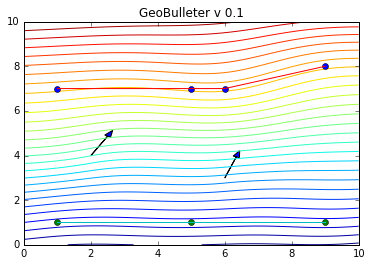

In [758]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(50,50) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

In [443]:
n = 10
#a = T.horizontal_stack(T.vertical_stack(T.ones(n),T.zeros(n)), T.vertical_stack(T.zeros(n), T.ones(n)))
a = T.zeros(n)

print (a.eval())
#U_G = T.horizontal_stack(([T.ones(n),T.zeros(n)],[T.zeros(n),T.ones(n)]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
T.stack?ö+aeg

In [ ]:
_squared_euclidean_distances2 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_Y ** 2).sum(1).reshape(
                (1, aux_Y.shape[0])) - 2 * dips.dot(aux_Y.T))

        _squared_euclidean_distances3 = T.sqrt(
            (dips ** 2).sum(1).reshape((dips.shape[0], 1)) + (aux_X ** 2).sum(1).reshape(
                (1, aux_X.shape[0])) - 2 * dips.dot(aux_X.T))

        h3 = T.vertical_stack(
            (dips[:, 0] - aux_Y[:, 0].reshape((aux_Y[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_Y[:, 1].reshape((aux_Y[:, 1].shape[0], 1))).T
        )


        h4 = T.vertical_stack(
            (dips[:, 0] - aux_X[:, 0].reshape((aux_X[:, 0].shape[0], 1))).T,
            (dips[:, 1] - aux_X[:, 1].reshape((aux_X[:, 1].shape[0], 1))).T)

        r_3 = T.tile(_squared_euclidean_distances2, (2, 1))  # Careful with the number of dimensions
        r_4 = T.tile(_squared_euclidean_distances3, (2, 1))  # Careful with the number of dimensions

        _ans_d1_3 = (r_3 < self.a) * (
            -7 * (self.a - r_3) ** 3 * r_3 * (8 * self.a ** 2 + 9 * self.a * r_3 + 3 * r_3 ** 2) * 1) 
        / (4 * self.a ** 7)

        _ans_d1_4 = (r_4 < self.a) * (
            -7 * (self.a - r_4) ** 3 * r_4 * (8 * self.a ** 2 + 9 * self.a * r_4 + 3 * r_4 ** 2) * 1) 
        / (4 * self.a ** 7)

        _C_GI = (h3 / r_3 * _ans_d1_3 - h4 / r_4 * _ans_d1_4).T

        self._f_CGI = theano.function([dips, aux_X, aux_Y], _C_GI)

In [67]:
import geomodeller_xml_obj
data = geomodeller_xml_obj.GeomodellerClass()
data.load_geomodeller_file('/home/bl3/PycharmProjects/Temp_SandstoneCopy/Temp_SandstoneCopy.xml')
section_elements = data.get_sections() # This reads geomodeller sections. Each section one object

data.get_formation_point_data(section_elements[0])
points_elements = [data.get_formation_point_data(i) for i in section_elements]
print (points_elements[0][0])
points_coord = data.get_point_coordinates(points_elements[0][0])

importlib.reload(geomodeller_xml_obj)

data = geomodeller_xml_obj.GeomodellerClass()
data.load_geomodeller_file('/home/bl3/PycharmProjects/Temp_SandstoneCopy/Temp_SandstoneCopy.xml')
section_dict = data.create_sections_dict()
contact_points_dict = {}
foliation_dict = {}
for i in range(len(section_dict)):
    print ("\n\n\n", next (iter (section_dict.values())), "\n")
    print ("Elements and their ID \n")
    contact_points = data.get_formation_point_data( next (iter (section_dict.values())))

    try:
        for contact_point in contact_points:
            contact_points_dict[contact_point.get("ObservationID")] = contact_point
            print (contact_point, contact_point.get("ObservationID"))
    except TypeError:
        print ("No contact points in the section")
    #ObsID = contact_points.get("ObservationID")
    foliations = data.get_foliations( next (iter (section_dict.values())))
    try:
        for foliation in foliations:
            # dictionary to access with azimth name
            foliation_dict[foliation.get("ObservationID")+"_a"] = foliation
            # dictionary to access with dip name
            foliation_dict[foliation.get("ObservationID")+"_d"] = foliation
            print (foliation, foliation.get("ObservationID"))

    except TypeError:
        print ("No foliation in the section")
    try:
        coord_interface = data.get_point_coordinates(contact_points)
    except TypeError:
        print ("Element does not have iterable objects")

    print ("\nDictionaries:\n ", contact_points_dict, "\n", foliation_dict)

    print ("\n Contact points", contact_points, "\n", coord_interface, "\n")

    print ("foliations" , foliations,  "\n")
    try:
        for i in range(len(foliations)):
            print ("azimut:",data.get_foliation_azimuth(foliations[i]))
            print ("dip",data.get_foliation_dip(foliations[i]))
            print ("coordinates", data.get_foliation_coordinates(foliations[i]))
    except TypeError:
        print ("No foliation in the section")




 <Element '{http://www.geomodeller.com/geo}Section' at 0x7f9624974f48> 

Elements and their ID 

<Element '{http://www.geomodeller.com/geo}Interface' at 0x7f9624970098> SM_Seis_E
<Element '{http://www.geomodeller.com/geo}Interface' at 0x7f96249701d8> SM_Seis_C
<Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f9624970368> SM_Seis_Ori_C
<Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f96249704f8> SM_Seis_Ori_E
<Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f9624970688> SM_Seis_Ori_W

Dictionaries:
  {'SM_Seis_E': <Element '{http://www.geomodeller.com/geo}Interface' at 0x7f9624970098>, 'SM_Seis_C': <Element '{http://www.geomodeller.com/geo}Interface' at 0x7f96249701d8>} 
 {'SM_Seis_Ori_E_d': <Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f96249704f8>, 'SM_Seis_Ori_W_a': <Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f9624970688>, 'SM_Seis_Ori_W_d': <Element '{http://www.geomodeller.com/geo}Foliation' at 0x7f9624970688>, 'SM_Seis_